# Tobacco Documents Classification

# Mathieu VANDECASTEELE - MASTER SID 2018-2019

## Université de Rouen

Joint à ce rapport : scripts Python

In [1]:
from script import *

Ce document a pour but de rapporter l'étude de la classification des types des différents documents émis lors des procès contre les industries du tabac aux États-Unis.

Plan de l'étude :
* Description statistique et analyse du jeu de données
* Découpe / Préparation / Pré-Traitement des données
* Apprentissages de classifieurs
* Conclusion, dernières analyses et Pistes d'amélioration

# 1. Analyse des données

### Premières statistiques

L'État américain a collecté plus de 14 millions de documents, ici nous disposons d'un échantillon de 3482 éléments précisemment. 
Nous devons établir un classifieur de documents, nous avons 10 types différents à différenciers : Email, Advertisement, Form, Letter, etc.
Première constatation dans un premier temps : 3482 données ce n'est pas beaucoup, cela pourra plus tard poser des problèmes, surtout pour une classification multi-classes.


Nous disposons comme données d'un .csv avec l'image_path et le label associé pour chacune. Nous disposons également des textes de ces images obtenus par OCR.

In [2]:
# Premiers Import nécessaires et Import des données.
import pandas as pd
csv_path = 'data/Tobacco3482.csv'
data = pd.read_csv(csv_path, sep = ",")

On vérifie avec .describe() si on a bien 3482 données et s'il ya bien 10 labels différents :

In [3]:
data.describe(include='all')

,img_path,label
count,3482,3482
unique,3482,10
top,Scientific/10073624.jpg,Memo
freq,1,620


Il semble y avoir 3482 éléments également contenus dans les dossiers de textes obtenus par OCR donc on a pas de problèmes de cohérences de nombres de données entre le .csv et ces dernières.

### Répartition des données

Analysons la répartition des données avec quelques statistiques descriptives. Tout d'abord piochons 10 données au hasard pour établir une première observation :


In [27]:
data.sample(10)

,img_path,label
3013,Report/514120277.jpg,Report
614,Email/2085542332c.jpg,Email
642,Email/2085761260b.jpg,Email
3109,Resume/40005130-5131.jpg,Resume
590,Email/2085134821a.jpg,Email
2881,Report/502339200+-9201.jpg,Report
722,Email/527862259+-2259.jpg,Email
2909,Report/504330344_504330348.jpg,Report
2011,Memo/2024072051_2024072053.jpg,Memo
827,Email/81887335.jpg,Email


Il semble y avoir plus d'emails que d'autres types de documents dans notre jeu de données. On note aussi en relançant la commande que pas mal de lettres ou encore de memos sont présents. Avons-nous une sur-représentation d'une ou plusieurs classe(s) particulière(s) ?

On peut tracer le diagramme bâtons du nombre de documents par type de documents :

Memo             620
Email            599
Letter           567
Form             431
Report           265
Scientific       261
Advertisement    230
Note             201
News             188
Resume           120
Name: label, dtype: int64


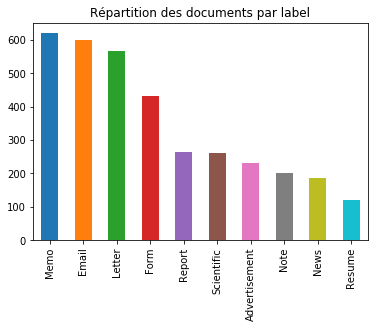

In [28]:
repartition_numbers = data['label'].value_counts()
print(repartition_numbers)
repartition_numbers.plot.bar(title = 'Répartition des documents par label')

Nous avons bel et bien 4 classes supérieures en nombre de données aux autres mais nous ne pouvons pas vraiment parler de sur-représensation.
Le nombre de données restant globalement faible, si les résultats après apprentissage automatique de classifieurs ne sont pas satisfaisants, il faudrait augmenter ce nombre : avec de l'augmentation de données par exemple.

### Statistiques Textuelles sur les classes

À partir des données OCR, **étudions le nombre de mots moyens par type de document :**

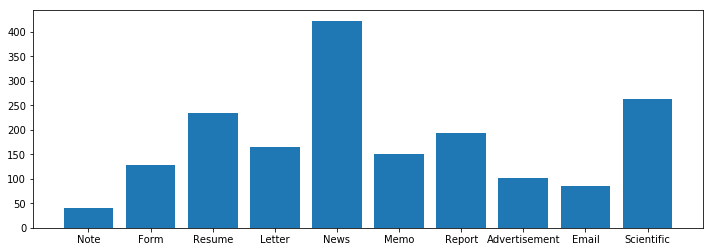

In [29]:
dictionnary_word_average_number = count_average_number_of_words_per_class('data/Tobacco3482-OCR/')
plt.figure(figsize=(12,4))
plt.bar(range(len(dictionnary_word_average_number)), list(dictionnary_word_average_number.values()), align='center')
plt.xticks(range(len(dictionnary_word_average_number)), list(dictionnary_word_average_number.keys()))
plt.show()

# 2. Pre-Processing et Découpe

In [30]:
datasets = organize_and_split_data(csv_path)
X_train = datasets[0]
X_val = datasets[1]
X_test = datasets[2]
X_trainval = datasets[3]
y_train = datasets[4]
y_val = datasets[5]
y_test = datasets[6]
y_trainval = datasets[7]

taille de X : 3482
taille de y : 3482
Fabriqué 4 jeux de données depuis les données : X_train, X_val, X_test, X_trainval (X_train+X_val) 
taille de train : 2089
taille de val : 696
taille de trainval : 2785
taille de test : 697


# 3. Tokenization et Entraînements

In [31]:
datasets_tokenized_idf = tokenizing_and_tfidf(X_trainval, X_test)
X_trainval_tf = datasets_tokenized_idf[0]
X_test_tf = datasets_tokenized_idf[1]

Tokenization...
Terminé !

Taille du vocabulaire :
77566

Nombre de sets retournés : 2
TFIDF...
Terminé !
Nombre de sets retournés : 2


## 1er entraînement :

In [32]:
first_MulNB = my_MultinomialNB(X_trainval_tf, X_test_tf, y_trainval, y_test)

Entraînement...
Terminé !

Evaluation par Cross-Validation (5) avec alpha = 1.0 :
0.4692737729575612

Précision/Score sur les données de Test : 
0.5150645624103299

Matrice de Confusion :
[[  6   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   1   1   0   0   0]
 [  3   0  38   0   0   6   7   1   0   7]
 [ 13   9   7  94  11  28   4  15  21  23]
 [ 23  15  38  29 107   5  29  19   0  23]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.13      1.00      0.24         6
           1       0.82      0.98      0.90       114
           2       0.46      0.61      0.52        62
           3       0.76      0.42      0.54       225
           4       0.91      0.37      0.53       288
           5       0.00    

## Optimisation des Hyperparamètres :

In [33]:
Optimisation_MultNB = Grid_Search_CV_MultinomialNB(X_trainval, y_trainval)

Grid Search MultinomialNB en cours...
Pipeline à suivre : ['vector', 'tfidf', 'clf']
Paramètres à tester:
{'clf__alpha': (0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0),
 'vector__max_df': (0.5, 0.7, 0.75, 0.8),
 'vector__max_features': (1000, 1500, 2000)}
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.6min finished


Terminé !

Meilleurs paramètres : 
	clf__alpha: 0.2
	vector__max_df: 0.8
	vector__max_features: 1000

Meilleur score: 0.713


## Entraînement optimisé MultinomialNB

In [34]:
datasets_tokenized_idf = tokenizing_and_tfidf(X_trainval, X_test, 1000, 0.8)
X_trainval_tf = datasets_tokenized_idf[0]
X_test_tf = datasets_tokenized_idf[1]

Tokenization...
Terminé !

Taille du vocabulaire :
1000

Nombre de sets retournés : 2
TFIDF...
Terminé !
Nombre de sets retournés : 2


In [35]:
final_MulNB = my_MultinomialNB(X_trainval_tf, X_test_tf, y_trainval, y_test,0.2)

Entraînement...
Terminé !

Evaluation par Cross-Validation (5) avec alpha = 0.2 :
0.7134447272522897

Précision/Score sur les données de Test : 
0.7130559540889526

Matrice de Confusion :
[[ 22   0   2   0   0   5   2   0   0   1]
 [  0 120   1   0   3   1   3   0   0   0]
 [  3   1  65   1   2   3   7   4   0   9]
 [  2   5   3  88  14   0   4   4   0   1]
 [  7   9   5  27  93   1  12   9   0   3]
 [  4   1   1   1   1  29   0   2   0   0]
 [  7   0   5   1   0   0  12   0   0   1]
 [  0   0   1   4   1   0   1  10   0   3]
 [  0   0   0   0   0   0   0   0  23   0]
 [  0   0   0   1   4   1   0   6   0  35]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        32
           1       0.88      0.94      0.91       128
           2       0.78      0.68      0.73        95
           3       0.72      0.73      0.72       121
           4       0.79      0.56      0.65       166
           5       0.72    

## Avec Bag of Words simplement :

### 1er entraînement :

In [36]:
datasets_tokenized_bow = tokenizing(X_trainval, X_test)
X_trainval_cv = datasets_tokenized_bow[0]
X_test_cv = datasets_tokenized_bow[1]

Tokenization...
Terminé !

Taille du vocabulaire :
77566

Nombre de sets retournés : 2


In [37]:
first_MulNB_bow = my_MultinomialNB(X_trainval_cv, X_test_cv, y_trainval, y_test)

Entraînement...
Terminé !

Evaluation par Cross-Validation (5) avec alpha = 1.0 :
0.6384137848707525

Précision/Score sur les données de Test : 
0.667144906743185

Matrice de Confusion :
[[ 11   0   1   0   0   1   0   0   0   0]
 [  0 106   0   0   0   0   1   0   0   0]
 [  8   0  57   0   0   4  15   1   0   8]
 [  6  18   4  98  17   0   6   9   0   2]
 [ 12  12  17  22 100   2  15  12   0  13]
 [  8   0   1   1   1  32   3   2   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   1   1   0   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0  23   0]
 [  0   0   2   1   0   1   0   4   0  30]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.24      0.85      0.38        13
           1       0.78      0.99      0.87       107
           2       0.69      0.61      0.65        93
           3       0.80      0.61      0.69       160
           4       0.85      0.49      0.62       205
           5       0.80     

### Optimisation des Hyperparamètres :

In [14]:
Optimisation_MultNB_bow = Grid_Search_CV_MultinomialNB(X_trainval, y_trainval,3,False)

Grid Search MultinomialNB en cours...
Pipeline à suivre : ['vector', 'clf']
Paramètres à tester:
{'clf__alpha': (0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0),
 'vector__max_df': (0.1, 0.2, 0.5, 0.7, 0.75, 0.8),
 'vector__max_features': (500, 1000, 1500, 2000)}
Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  5.8min finished


Terminé !

Meilleurs paramètres : 
	clf__alpha: 0.05
	vector__max_df: 0.75
	vector__max_features: 2000

Meilleur score: 0.725


### Entrainement Final BOW

In [38]:
datasets_tokenized_bow = tokenizing(X_trainval, X_test,2000,0.75)
X_trainval_cv = datasets_tokenized_bow[0]
X_test_cv = datasets_tokenized_bow[1]

Tokenization...
Terminé !

Taille du vocabulaire :
2000

Nombre de sets retournés : 2


In [39]:
final_MulNB_bow = my_MultinomialNB(X_trainval_cv, X_test_cv, y_trainval, y_test, 0.05)

Entraînement...
Terminé !

Evaluation par Cross-Validation (5) avec alpha = 0.05 :
0.7213508949131535

Précision/Score sur les données de Test : 
0.7388809182209469

Matrice de Confusion :
[[ 24   0   3   0   0   5   4   0   0   1]
 [  0 127   0   0   3   0   3   0   0   0]
 [  3   0  65   2   2   2   4   0   0   8]
 [  1   4   3  95  13   0   4   3   0   1]
 [  7   4   4  18  90   1  10   7   0   8]
 [  3   1   1   2   2  29   0   3   0   1]
 [  7   0   6   1   1   2  15   1   0   1]
 [  0   0   0   4   4   0   1  17   0   3]
 [  0   0   0   0   0   0   0   0  23   0]
 [  0   0   1   1   3   1   0   4   0  30]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.53      0.65      0.59        37
           1       0.93      0.95      0.94       133
           2       0.78      0.76      0.77        86
           3       0.77      0.77      0.77       124
           4       0.76      0.60      0.67       149
           5       0.72   

### Deep Learning / MLP Classifier TF-IDF

In [40]:
datasets_tokenized_idf = tokenizing_and_tfidf(X_trainval, X_test, 2000, 0.80)
X_trainval_tf = datasets_tokenized_idf[0]
X_test_tf = datasets_tokenized_idf[1]

Tokenization...
Terminé !

Taille du vocabulaire :
2000

Nombre de sets retournés : 2
TFIDF...
Terminé !
Nombre de sets retournés : 2


In [41]:
first_mlp_tfidf = my_MLP(X_trainval_tf, X_test_tf, y_trainval, y_test, 0.0001, 'relu',100 ,True, True, 'auto')

Iteration 1, loss = 2.25689994
Validation score: 0.354839
Iteration 2, loss = 2.09381729
Validation score: 0.480287
Iteration 3, loss = 1.90010940
Validation score: 0.544803
Iteration 4, loss = 1.69537790
Validation score: 0.609319
Iteration 5, loss = 1.49011713
Validation score: 0.645161
Iteration 6, loss = 1.29547407
Validation score: 0.684588
Iteration 7, loss = 1.12509222
Validation score: 0.716846
Iteration 8, loss = 0.98290996
Validation score: 0.727599
Iteration 9, loss = 0.86478987
Validation score: 0.759857
Iteration 10, loss = 0.76713597
Validation score: 0.781362
Iteration 11, loss = 0.68622309
Validation score: 0.795699
Iteration 12, loss = 0.61797642
Validation score: 0.795699
Iteration 13, loss = 0.55865713
Validation score: 0.795699
Iteration 14, loss = 0.50691713
Validation score: 0.795699
Iteration 15, loss = 0.46251226
Validation score: 0.813620
Iteration 16, loss = 0.42153406
Validation score: 0.802867
Iteration 17, loss = 0.38569751
Validation score: 0.817204
Iterat

### Optimisation Hyperparamètres

In [18]:
Optimisation_MLP_tfidf = Grid_Search_CV_MLP(X_trainval_tf, y_trainval,2)

Grid Search MLP en cours...
Pipeline à suivre : ['mlp']
Paramètres à tester:
{'mlp__activation': ('relu', 'logistic'), 'mlp__batch_size': (50, 100)}
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.7min finished


Terminé !

Meilleurs paramètres : 
	mlp__activation: 'logistic'
	mlp__batch_size: 50

Meilleur score: 0.761


### Entrainement Final DL - TFIDF

In [42]:
final_mlp_tfidf = my_MLP(X_trainval_tf, X_test_tf, y_trainval, y_test, 0.0001, 'logistic',100 ,True, True, 50)

Iteration 1, loss = 2.17435452
Validation score: 0.279570
Iteration 2, loss = 2.08479468
Validation score: 0.405018
Iteration 3, loss = 2.00576309
Validation score: 0.469534
Iteration 4, loss = 1.91351482
Validation score: 0.444444
Iteration 5, loss = 1.80374910
Validation score: 0.537634
Iteration 6, loss = 1.67901232
Validation score: 0.634409
Iteration 7, loss = 1.55452296
Validation score: 0.605735
Iteration 8, loss = 1.42735403
Validation score: 0.645161
Iteration 9, loss = 1.30958427
Validation score: 0.684588
Iteration 10, loss = 1.19981167
Validation score: 0.706093
Iteration 11, loss = 1.10263250
Validation score: 0.724014
Iteration 12, loss = 1.01450640
Validation score: 0.727599
Iteration 13, loss = 0.93865186
Validation score: 0.741935
Iteration 14, loss = 0.86964208
Validation score: 0.752688
Iteration 15, loss = 0.80905079
Validation score: 0.749104
Iteration 16, loss = 0.75509574
Validation score: 0.777778
Iteration 17, loss = 0.70681450
Validation score: 0.784946
Iterat

### DL - BOW

In [43]:
datasets_tokenized_bow = tokenizing(X_trainval, X_test,2000,0.75)
X_trainval_cv = datasets_tokenized_bow[0]
X_test_cv = datasets_tokenized_bow[1]

Tokenization...
Terminé !

Taille du vocabulaire :
2000

Nombre de sets retournés : 2


### 1er entraînement

In [44]:
first_mlp_bow = my_MLP(X_trainval_cv, X_test_cv, y_trainval, y_test, 0.0001, 'relu',100 ,True, True, 'auto')

Iteration 1, loss = 1.92434087
Validation score: 0.623656
Iteration 2, loss = 1.15218400
Validation score: 0.716846
Iteration 3, loss = 0.77590377
Validation score: 0.788530
Iteration 4, loss = 0.56883509
Validation score: 0.802867
Iteration 5, loss = 0.44259638
Validation score: 0.802867
Iteration 6, loss = 0.35956519
Validation score: 0.799283
Iteration 7, loss = 0.29885061
Validation score: 0.813620
Iteration 8, loss = 0.25525829
Validation score: 0.795699
Iteration 9, loss = 0.22032924
Validation score: 0.810036
Iteration 10, loss = 0.19264041
Validation score: 0.813620
Iteration 11, loss = 0.17018337
Validation score: 0.820789
Iteration 12, loss = 0.15155542
Validation score: 0.813620
Iteration 13, loss = 0.13613187
Validation score: 0.820789
Iteration 14, loss = 0.12286913
Validation score: 0.817204
Iteration 15, loss = 0.11164829
Validation score: 0.810036
Iteration 16, loss = 0.10168763
Validation score: 0.813620
Iteration 17, loss = 0.09347695
Validation score: 0.802867
Iterat

### Optimisation Hyperparamètres

In [22]:
Optimisation_MLP_bow = Grid_Search_CV_MLP(X_trainval_cv, y_trainval,5)

Grid Search MLP en cours...
Pipeline à suivre : ['mlp']
Paramètres à tester:
{'mlp__activation': ('relu', 'tanh'), 'mlp__batch_size': (50, 150, 200)}
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.8min finished


Terminé !

Meilleurs paramètres : 
	mlp__activation: 'relu'
	mlp__batch_size: 200

Meilleur score: 0.768


### Entraînement Final DL BOW

In [45]:
final_mlp_bow = my_MLP(X_trainval_cv, X_test_cv, y_trainval, y_test, 0.0001, 'relu',100 ,True, True, 200)

Iteration 1, loss = 1.92434087
Validation score: 0.623656
Iteration 2, loss = 1.15218400
Validation score: 0.716846
Iteration 3, loss = 0.77590377
Validation score: 0.788530
Iteration 4, loss = 0.56883509
Validation score: 0.802867
Iteration 5, loss = 0.44259638
Validation score: 0.802867
Iteration 6, loss = 0.35956519
Validation score: 0.799283
Iteration 7, loss = 0.29885061
Validation score: 0.813620
Iteration 8, loss = 0.25525829
Validation score: 0.795699
Iteration 9, loss = 0.22032924
Validation score: 0.810036
Iteration 10, loss = 0.19264041
Validation score: 0.813620
Iteration 11, loss = 0.17018337
Validation score: 0.820789
Iteration 12, loss = 0.15155542
Validation score: 0.813620
Iteration 13, loss = 0.13613187
Validation score: 0.820789
Iteration 14, loss = 0.12286913
Validation score: 0.817204
Iteration 15, loss = 0.11164829
Validation score: 0.810036
Iteration 16, loss = 0.10168763
Validation score: 0.813620
Iteration 17, loss = 0.09347695
Validation score: 0.802867
Iterat

# Conclusion

Pour conclure, nous avons réalisé plusieurs classifiers et il semble que les méthodes utilisant le Deep Learning soient le plus efficaces. De même, on peut constater que parfois appliquer une TF-IDF ne permet pas de progresser dans la classification et qu'un simple modèle Bag of Words suffit.
À retenir également aussi qu'il est important de choisir un nombre max de features lorsque l'on construit un vocabulaire, cela a une influence non-négligeable sur les résultats finaux.

Ces résultats d'environ 80% sont satisfaisants mais nous pouvons aller plus loin :
* Améliorer l'OCR pour une meilleur reconnaissance des mots et gagner en classification.
* Augmenter le nombre de données disponibles, il n'y en a pas assez pour certaines classes qui sont parfois sous-représentées par rapport à d'autres.
* Utiliser un autre modèle de représentation pour les textes comme des Embeddings.
* Utiliser des réseaux de neurones plus complexes comme les LSTM, notamment avec le framework Keras.
* Posséder un peu plus de puissance de calcul afin de tuner beaucoup plus d'hyper-paramètres.